Estimate of π with 100 samples: 3.0, Time taken: 0.000204 seconds, Error: 4.507034 %
Estimate of π with 1000 samples: 3.176, Time taken: 0.001666 seconds, Error: 1.095220 %
Estimate of π with 10000 samples: 3.1252, Time taken: 0.026462 seconds, Error: 0.521794 %
Estimate of π with 100000 samples: 3.1378, Time taken: 0.260559 seconds, Error: 0.120724 %
Estimate of π with 1000000 samples: 3.141468, Time taken: 2.060447 seconds, Error: 0.003968 %


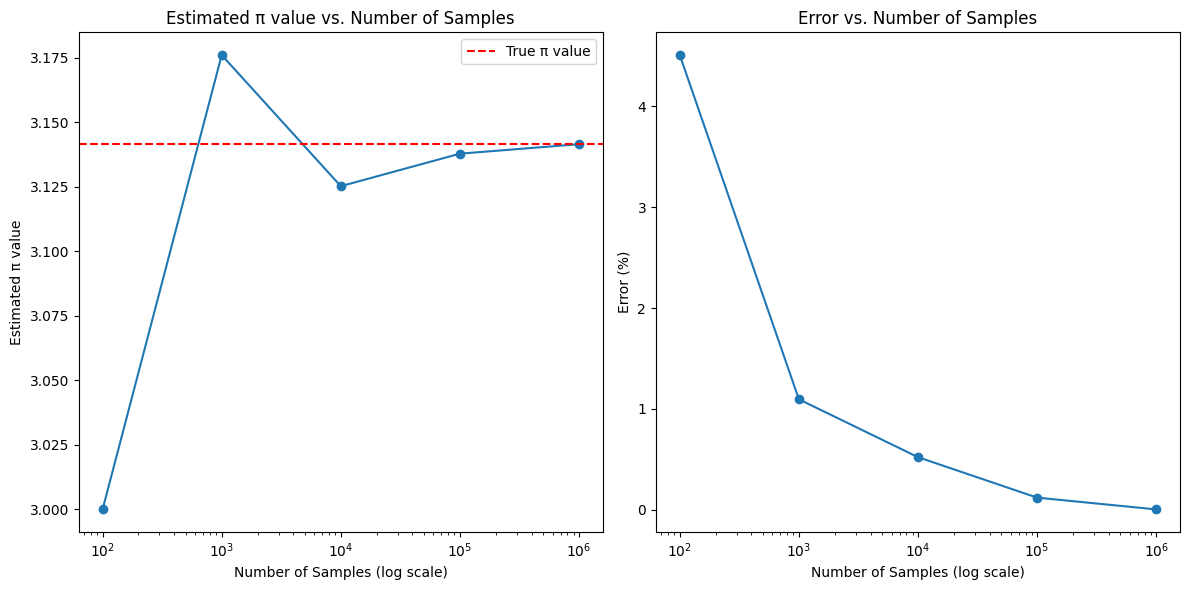

In [10]:
import random
import time
import math
import matplotlib.pyplot as plt

# Define the function to estimate pi value
def estimate_pi(num_samples):
    # Count of points inside the circle
    inside_circle = 0

    for i in range(num_samples):
        # Use a random number generator between -1 to 1
        # to randomly sample points in the square
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # Check if one point is within the circle
        if x**2 + y**2 <= 1:
            inside_circle += 1

    # pi = 4 * A_circle / A_square
    return (inside_circle / num_samples) * 4

# A list of number of samples
num_sample_list = [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]

# Initialize lists to store results
pi_estimates = []
errors = []
compute_times = []

# For each # of samples
for num_sample in num_sample_list:
    # Call the function to estimate pi and record computation time
    start_time = time.time()
    pi_estimate = estimate_pi(num_sample)
    end_time = time.time()
    compute_time = end_time - start_time

    # Calculate the error
    error = abs(pi_estimate - math.pi) / math.pi * 100  # Convert to percentage

    # Store results
    pi_estimates.append(pi_estimate)
    errors.append(error)
    compute_times.append(compute_time)

    print(f"Estimate of π with {num_sample} samples: {pi_estimate}, Time taken: {compute_time:.6f} seconds, Error: {error:.6f} %")

# Plot π estimates vs. # of samples
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_sample_list, pi_estimates, marker='o')
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Estimated π value')
plt.title('Estimated π value vs. Number of Samples')
plt.axhline(y=math.pi, color='r', linestyle='--', label='True π value')
plt.legend()

# Plot error vs. # of samples
plt.subplot(1, 2, 2)
plt.plot(num_sample_list, errors, marker='o')
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Error (%)')
plt.title('Error vs. Number of Samples')

plt.tight_layout()
plt.show()